## TAREFA 3 – AVALIAÇÃO DE DESEMPENHO
### Gabriela Almeida

É possível tornar um programa mais eficiente usando opções do compilador para gerar instruções SIMD. O objetivo dessa tarefa é quantificar essa diferença de desempenho usando funções que consistem em manipulações matemáticas em vetores de tamanhos variados.
<br> 
<br> 
Essas diferentes funções estão presentes no arquivo *funcs.cpp*, o qual ao ser compilado e executado gera 21 vetores com conteúdos e tamanhos variados (de 100 a 100 milhões de elementos) e calcula o tempo que demorar para executar cada função em todos os elementos desses vetores. Por fim é gerado um arquivo *t3Tempos.txt* que contem um vetor chamado “tamanhos” o qual possui os tamanhos dos vetores usados para fazer os cálculos em cada iteração. Além disso, contem vetores para cada tipo de função, o qual possui o tempo gasto para fazer aquele cálculo naquela iteração.

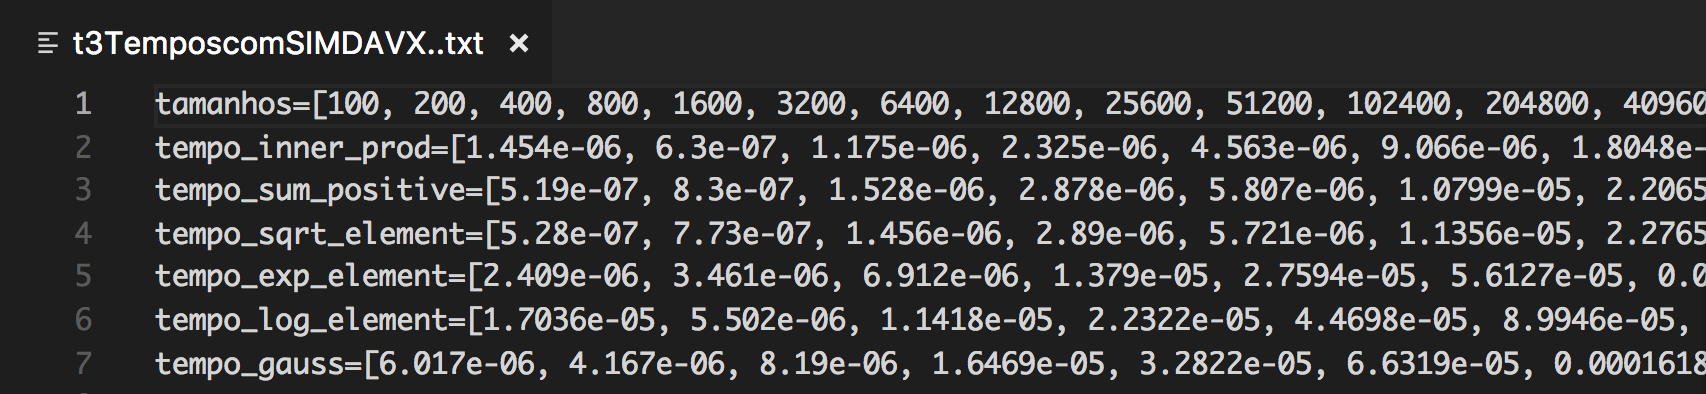

In [21]:
from IPython.display import Image
Image("Figura1.png")

Analisando a imagem a cima é possível deduzir que na primeira iteração foi gerado um vetor de 100 elementos e que para calcular, por exemplo, a raiz de cada um deles (tempo_sqrt_element) demorou 5.19 e-07 segundos. Já na segunda iteração foi gerado um vetor com 200 elementos e para calcular o exponencial de cada um deles (tempo_exp_element) demorou 3.1461 e-06 segundos.
<br>
<br>
Para poder quantificar a diferença de desempenho é preciso compilar o arquivo *funcs.cpp* de diferentes formas. Primeiramente ele é compilado sem habilitar a auto vetorização:

    g++ -o funcsSemSIMD funcs.cpp

e então esse programa é executado gerando o arquivo *t3Tempos.txt* o qual é aconselhável renomear pois quando compilar o arquivo *funcs.cpp* novamente, porém habilitando a auto vetorização, esse arquivo será sobrescrito. Portanto renomeia-se o arquivo para *t3TemposSemSIMD.txt*. 
<br>
<br>
	Em um segundo momento compila-se o programa habilitando a auto vetorização e utilizando uma arquitetura AVX: 


    g++ -ffast-math -ftree-vectorize -mavx -o funcscomSIMDAVX funcs.cpp

Após a execução do programa renomeia-se o arquivo de saída gerado para *t3TemposcomSIMDAVX.txt*. Por fim o programa é compilado habilitando a auto vetorização utilizando uma arquitetura AVX2:


    g++ -ffast-math -ftree-vectorize -mavx2 -o funcscomSIMDAVX2 funcs.cpp

e após a execução do programa é aconselhável renomear o arquivo de saída para *t3TemposcomSIMDAVX2.txt.*

Esses arquivos de saída foram importados nesse notebook e para poder diferenciar os vetores de cada um deles seus nomes foram alterados. Nos vetores do arquivo *t3TemposSemSIMD.txt* foi adicionado "_sem_SIMD" ao final:

In [22]:
tamanhos=[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400, 204800, 409600, 819200, 1638400, 3276800, 6553600, 13107200, 26214400, 52428800, 104857600]
tempo_inner_prod_sem_SIMD=[1.437e-06, 8.14e-07, 1.486e-06, 2.925e-06, 5.806e-06, 1.1536e-05, 8.1364e-05, 4.4729e-05, 8.9376e-05, 0.000179165, 0.000357376, 0.000659394, 0.00132275, 0.00276361, 0.00529802, 0.0106888, 0.0212054, 0.0464522, 0.0874939, 0.183272, 0.353896]
tempo_sum_positive_sem_SIMD=[5.92e-07, 1.044e-06, 1.893e-06, 3.988e-06, 7.539e-06, 1.5104e-05, 2.9599e-05, 5.8329e-05, 0.000117067, 0.000253735, 0.000480179, 0.00108333, 0.00177916, 0.00351841, 0.00693118, 0.0146096, 0.029133, 0.0600793, 0.117348, 0.232968, 0.489947]
tempo_sqrt_element_sem_SIMD=[7.42e-07, 1.336e-06, 2.637e-06, 5.25e-06, 1.0366e-05, 2.0627e-05, 4.0174e-05, 8.0478e-05, 0.000160727, 0.000347618, 0.000621149, 0.00122888, 0.00255889, 0.00469872, 0.00957703, 0.0193183, 0.039568, 0.0800046, 0.157444, 0.314187, 0.637455]
tempo_exp_element_sem_SIMD=[3.407e-06, 5.189e-06, 1.0481e-05, 2.0601e-05, 4.1071e-05, 8.2385e-05, 0.000226551, 0.00121192, 0.000668743, 0.0013756, 0.00262651, 0.00535092, 0.00965181, 0.0196186, 0.0406361, 0.0784835, 0.155119, 0.316284, 0.626449, 1.23655, 2.46487]
tempo_log_element_sem_SIMD=[2.7263e-05, 7.402e-06, 1.4605e-05, 2.918e-05, 5.8114e-05, 0.000116727, 0.000439255, 0.000913346, 0.0008993, 0.00182836, 0.00370334, 0.0073057, 0.0136025, 0.027434, 0.0551053, 0.110849, 0.216659, 0.43321, 0.874315, 1.76986, 3.57719]
tempo_gauss_sem_SIMD=[7.676e-06, 7.019e-06, 1.4013e-05, 2.7847e-05, 5.5811e-05, 0.000112132, 0.0003093, 0.000531779, 0.000935225, 0.00208294, 0.0034665, 0.00664346, 0.0135294, 0.0270317, 0.0526527, 0.108765, 0.211101, 0.424405, 0.838082, 1.70411, 3.40143]

Nos vetores do arquivo *t3TemposcomSIMDAVX.txt* foi adicionado "_com_SIMDAVX" ao final:

In [23]:
tempo_inner_prod_com_SIMDAVX=[1.454e-06, 6.3e-07, 1.175e-06, 2.325e-06, 4.563e-06, 9.066e-06, 1.8048e-05, 3.6252e-05, 7.2174e-05, 0.000132501, 0.00037356, 0.000553376, 0.0010591, 0.00234233, 0.0046989, 0.00859473, 0.0172377, 0.0343032, 0.0688543, 0.143801, 0.284067]
tempo_sum_positive_com_SIMDAVX=[5.19e-07, 8.3e-07, 1.528e-06, 2.878e-06, 5.807e-06, 1.0799e-05, 2.2065e-05, 4.3945e-05, 8.4336e-05, 0.000213958, 0.000338429, 0.000689932, 0.00132666, 0.00275601, 0.00526706, 0.0111565, 0.0227213, 0.0440032, 0.087137, 0.179882, 0.34834]
tempo_sqrt_element_com_SIMDAVX=[5.28e-07, 7.73e-07, 1.456e-06, 2.89e-06, 5.721e-06, 1.1356e-05, 2.2765e-05, 4.5368e-05, 9.0594e-05, 0.000239722, 0.000331684, 0.00117155, 0.00132816, 0.0030251, 0.0056673, 0.0113352, 0.0230072, 0.0454702, 0.0906338, 0.185884, 0.353191]
tempo_exp_element_com_SIMDAVX=[2.409e-06, 3.461e-06, 6.912e-06, 1.379e-05, 2.7594e-05, 5.6127e-05, 0.000110364, 0.000222797, 0.000443961, 0.000861739, 0.0018549, 0.00386764, 0.00695259, 0.0135528, 0.0276755, 0.0598118, 0.11182, 0.218757, 0.43771, 0.873532, 1.77404]
tempo_log_element_com_SIMDAVX=[1.7036e-05, 5.502e-06, 1.1418e-05, 2.2322e-05, 4.4698e-05, 8.9946e-05, 0.000180651, 0.00036196, 0.000733031, 0.00206887, 0.00291708, 0.00581736, 0.0116535, 0.0226886, 0.0451693, 0.0893897, 0.178697, 0.357279, 0.797245, 1.42829, 2.87045]
tempo_gauss_com_SIMDAVX=[6.017e-06, 4.167e-06, 8.19e-06, 1.6469e-05, 3.2822e-05, 6.6319e-05, 0.000161851, 0.000278531, 0.000534441, 0.00122299, 0.00237405, 0.00432063, 0.00824555, 0.0166538, 0.0332805, 0.0675636, 0.131279, 0.265679, 0.521966, 1.05642, 2.11947]

E nos vetores do arquivo *t3TemposcomSIMDAVX2.txt* foi adicionado "_com_SIMDAVX2" ao final

In [24]:
tempo_inner_prod_com_SIMDAVX2=[1.25e-06, 7.27e-07, 1.759e-06, 3.045e-06, 4.619e-06, 1.0042e-05, 2.0138e-05, 3.9026e-05, 7.6026e-05, 0.00014663, 0.00028389, 0.000632229, 0.00148253, 0.00218268, 0.00429423, 0.00991874, 0.0199561, 0.0375127, 0.0704909, 0.14702, 0.300591]
tempo_sum_positive_com_SIMDAVX2=[5.06e-07, 1.025e-06, 2.483e-06, 3.874e-06, 1.9684e-05, 1.2058e-05, 2.3997e-05, 4.9811e-05, 0.000119936, 0.00017157, 0.000353487, 0.000680316, 0.00193171, 0.00288381, 0.005391, 0.0125181, 0.023457, 0.0466004, 0.0942948, 0.175788, 0.361102]
tempo_sqrt_element_com_SIMDAVX2=[5.38e-07, 8.74e-07, 2.754e-06, 4.659e-06, 6.663e-06, 1.2641e-05, 2.5295e-05, 4.895e-05, 9.1672e-05, 0.000252428, 0.000404063, 0.00115732, 0.00237434, 0.00295474, 0.00693606, 0.0121172, 0.0235936, 0.0461658, 0.08903, 0.18209, 0.370828]
tempo_exp_element_com_SIMDAVX2=[2.53e-06, 5.821e-06, 1.0161e-05, 1.3879e-05, 3.1756e-05, 6.1354e-05, 0.000119826, 0.000251389, 0.000466684, 0.00134424, 0.0019, 0.00403498, 0.00932398, 0.0148225, 0.0298161, 0.0581128, 0.111862, 0.231718, 0.446757, 0.891161, 1.83572]
tempo_log_element_com_SIMDAVX2=[2.0165e-05, 8.407e-06, 1.4657e-05, 2.8779e-05, 5.1946e-05, 9.9939e-05, 0.000200892, 0.000388631, 0.0007281, 0.00174768, 0.0028564, 0.00553977, 0.010996, 0.0249523, 0.0475693, 0.0956673, 0.17897, 0.361214, 0.715297, 1.45305, 2.85702]
tempo_gauss_com_SIMDAVX2=[4.398e-06, 6.135e-06, 1.1255e-05, 1.6783e-05, 3.7993e-05, 7.3577e-05, 0.000156988, 0.000284559, 0.000537142, 0.00168464, 0.00315085, 0.00420629, 0.00945301, 0.0179832, 0.0350306, 0.0705584, 0.132634, 0.271406, 0.559347, 1.07018, 2.10904]

Foi entao criada a função "plotar" abaixo para poder analisar visualmente a melhora do desempenho quando se compila habilitando a auto vetorização. Para facilitar a análise, ao invés do eixo x obter os tamanhos efetivos dos vetores usados na análise, o que atrapalharia devido a grande diferença entre o menor e o maior tamanho de vetor, usou-se o índice desses valores no vetor "Tamanhos":

In [25]:
import matplotlib.pyplot as plt
t = []
for i in range (0, len(tamanhos)):
    t.append(i)
def plotar(vetor_sem_SIMD, vetor_com_com_SIMDAVX, vetor_com_SIMDAVX2, titulo):
    sem_SIMD, = plt.plot(t, vetor_sem_SIMD, 'ro-', label='sem SIMD')
    com_SIMDAVX, = plt.plot(t, vetor_com_com_SIMDAVX, 'bo-', label='com SIMD AVX')
    com_SIMDAVX2, = plt.plot(t, vetor_com_SIMDAVX2, 'co-', label= 'com SIMD AVX2')
    plt.xlabel('indice do vetor de tamanhos')
    plt.ylabel('Tempo')
    plt.title(titulo)
    plt.legend(handles=[sem_SIMD, com_SIMDAVX,com_SIMDAVX2])
    plt.show()

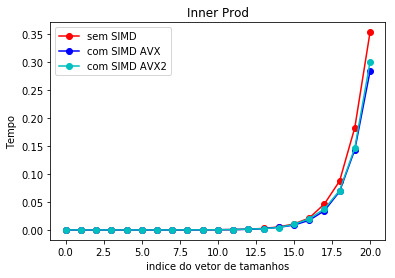

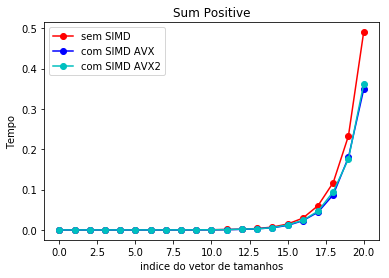

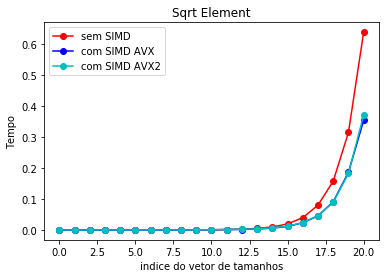

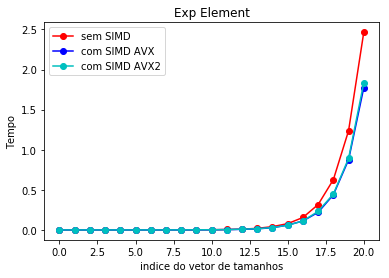

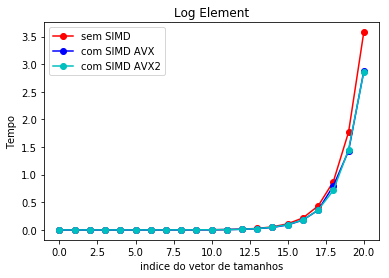

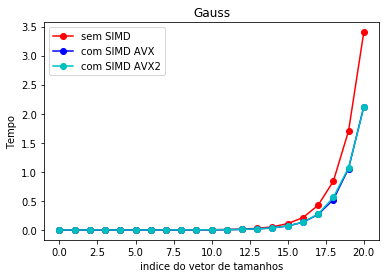

In [26]:
plotar(tempo_inner_prod_sem_SIMD,tempo_inner_prod_com_SIMDAVX,tempo_inner_prod_com_SIMDAVX2, 'Inner Prod')
plotar(tempo_sum_positive_sem_SIMD,tempo_sum_positive_com_SIMDAVX,tempo_sum_positive_com_SIMDAVX2, 'Sum Positive')
plotar(tempo_sqrt_element_sem_SIMD,tempo_sqrt_element_com_SIMDAVX,tempo_sqrt_element_com_SIMDAVX2, 'Sqrt Element')
plotar(tempo_exp_element_sem_SIMD,tempo_exp_element_com_SIMDAVX,tempo_exp_element_com_SIMDAVX2, 'Exp Element')
plotar(tempo_log_element_sem_SIMD,tempo_log_element_com_SIMDAVX,tempo_log_element_com_SIMDAVX2, 'Log Element')
plotar(tempo_gauss_sem_SIMD,tempo_gauss_com_SIMDAVX,tempo_gauss_com_SIMDAVX2, 'Gauss')

Analisando os gráficos a cima é possível perceber que só existem ganhos de desempenhos expressivos a partir do 15o tamanho de array representado no vetor "Tamanhos":

In [27]:
tamanhos[15]

3276800

Portanto a partir do tamanho de array 3 milhões o código vetorizado mostra ganhos de desempenho expressivos. Por isso foi criada outra função (plota_apartir15) a qual plota gráficos os quais é possível analisar melhor a diferença de desempenho apenas dos vetores cujo tamanho é maior que 3 milhões: 

In [28]:
for i in range (0, len(tempo_inner_prod_sem_SIMD)):
    t[i] = i
def plotar_apartir15(vetor_sem_SIMD, vetor_com_com_SIMDAVX, vetor_com_SIMDAVX2, titulo):
    sem_SIMD, = plt.plot(t[15:len(tamanhos)], vetor_sem_SIMD[15:len(t)], 'ro-', label='sem SIMD')
    com_SIMDAVX, = plt.plot(t[15:len(tamanhos)], vetor_com_com_SIMDAVX[15:len(t)], 'bo-', label='com SIMD AVX')
    com_SIMDAVX2, = plt.plot(t[15:len(tamanhos)], vetor_com_SIMDAVX2[15:len(t)], 'co-', label= 'com SIMD AVX2')
    plt.xlabel('indice no vetor de tamanhos')
    plt.ylabel('Tempo (s)')
    plt.title(titulo)
    plt.legend(handles=[sem_SIMD, com_SIMDAVX,com_SIMDAVX2])
    plt.show()

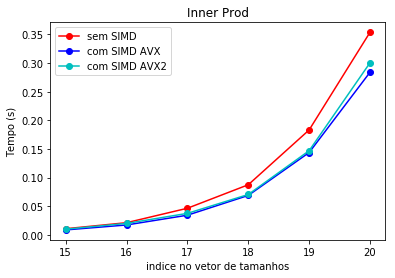

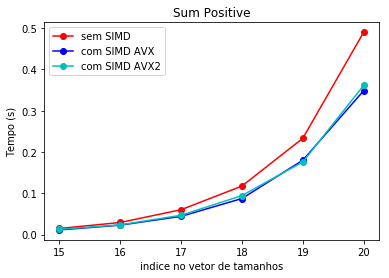

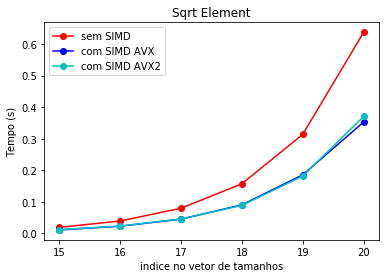

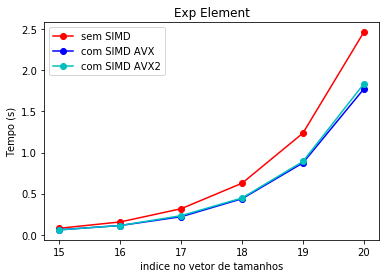

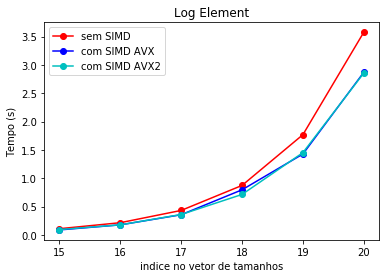

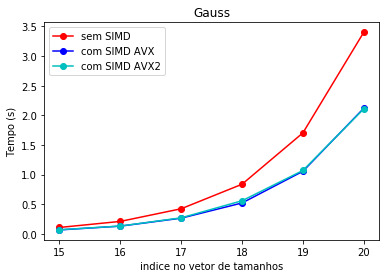

In [29]:
plotar_apartir15(tempo_inner_prod_sem_SIMD,tempo_inner_prod_com_SIMDAVX,tempo_inner_prod_com_SIMDAVX2, 'Inner Prod')
plotar_apartir15(tempo_sum_positive_sem_SIMD,tempo_sum_positive_com_SIMDAVX,tempo_sum_positive_com_SIMDAVX2, 'Sum Positive')
plotar_apartir15(tempo_sqrt_element_sem_SIMD,tempo_sqrt_element_com_SIMDAVX,tempo_sqrt_element_com_SIMDAVX2, 'Sqrt Element')
plotar_apartir15(tempo_exp_element_sem_SIMD,tempo_exp_element_com_SIMDAVX,tempo_exp_element_com_SIMDAVX2, 'Exp Element')
plotar_apartir15(tempo_log_element_sem_SIMD,tempo_log_element_com_SIMDAVX,tempo_log_element_com_SIMDAVX2, 'Log Element')
plotar_apartir15(tempo_gauss_sem_SIMD,tempo_gauss_com_SIMDAVX,tempo_gauss_com_SIMDAVX2, 'Gauss')

Como é possível perceber analisando os gráficos a cima, em todos os tipos de função, em todos os tamanhos de vetores, as compilações que a auto vetorização estava habilitada tiveram um desempenho melhor do que quando não estava desabilitada. Além disso é possível perceber que o desempenho da arquitetura AVX é, no geral, melhor que a da arquitetura AVX2.<br>
Um ponto importante a se destacar é que a arquitetura AVX usa registradores de 128 bits, ou seja, por registrador é possível armazenar 2 variáveis double (que é o tipo de variável usada nas funções). Portanto com a vetorização o ganho de desempenho deveria ser por volta de 2 vezes.

Para provar a afirmação acima, para descobrir os ganhos de desempenho e quais tipos de operações resultam em maior ganho de desempenho fez-se as médias dos ganhos de cada operação para cada tipo de arquitetura de auto vetorização:

In [30]:
inner_prod_media1=0
inner_prod_media2=0

sum_positive_media1=0
sum_positive_media2=0

sqrt_element_media1=0
sqrt_element_media2=0

exp_element_media1=0
exp_element_media2=0

log_element_media1=0
log_element_media2=0

gauss_media1=0
gauss_media2=0

cont = 0
for i in range (14 , len(tamanhos)):
    inner_prod_media1 = inner_prod_media1 + (tempo_inner_prod_sem_SIMD[i]/tempo_inner_prod_com_SIMDAVX[i])
    inner_prod_media2 = inner_prod_media2 + (tempo_inner_prod_sem_SIMD[i]/tempo_inner_prod_com_SIMDAVX2[i])
    
    sum_positive_media1 = sum_positive_media1 + (tempo_sum_positive_sem_SIMD[i]/tempo_sum_positive_com_SIMDAVX[i])
    sum_positive_media2 = sum_positive_media2 + (tempo_sum_positive_sem_SIMD[i]/tempo_sum_positive_com_SIMDAVX2[i])
    
    sqrt_element_media1 = sqrt_element_media1 + (tempo_sqrt_element_sem_SIMD[i]/tempo_sqrt_element_com_SIMDAVX[i])
    sqrt_element_media2 = sqrt_element_media2 + (tempo_sqrt_element_sem_SIMD[i]/tempo_sqrt_element_com_SIMDAVX2[i])
    
    exp_element_media1 = exp_element_media1 + (tempo_exp_element_sem_SIMD[i]/tempo_exp_element_com_SIMDAVX[i])
    exp_element_media2 = exp_element_media2 + (tempo_exp_element_sem_SIMD[i]/tempo_exp_element_com_SIMDAVX2[i])
    
    log_element_media1 = log_element_media1 + (tempo_log_element_sem_SIMD[i]/tempo_log_element_com_SIMDAVX[i])
    log_element_media2 = log_element_media2 + (tempo_log_element_sem_SIMD[i]/tempo_log_element_com_SIMDAVX2[i])
    
    gauss_media1 = gauss_media1 + (tempo_gauss_sem_SIMD[i]/tempo_gauss_com_SIMDAVX[i])
    gauss_media2 = gauss_media2 + (tempo_gauss_sem_SIMD[i]/tempo_gauss_com_SIMDAVX2[i])
    
    cont = cont +1
    
print("Média de ganho AVX para inner_prod= " + str(inner_prod_media1/cont))
print("Média de ganho AVX2 para inner_prod= " + str(inner_prod_media2/cont)+'\n')

print("Média de ganho AVX para sum_positive= " + str(sum_positive_media1/cont))
print("Média de ganho AVX2 para sum_positive= " + str(sum_positive_media2/cont)+'\n')

print("Média de ganho AVX para sqrt_element= " + str(sqrt_element_media1/cont))
print("Média de ganho AVX2 para sqrt_element= " + str(sqrt_element_media2/cont)+'\n')

print("Média de ganho AVX para exp_element= " + str(exp_element_media1/cont))
print("Média de ganho AVX2 para exp_element= " + str(exp_element_media2/cont)+'\n')

print("Média de ganho AVX para log_element= " + str(log_element_media1/cont))
print("Média de ganho AVX2 para log_element= " + str(log_element_media2/cont)+'\n')

print("Média de ganho AVX gauss= " + str(gauss_media1/cont))
print("Média de ganho AVX2 gauss= " + str(gauss_media2/cont))

Média de ganho AVX para inner_prod= 1.2495002775526947
Média de ganho AVX2 para inner_prod= 1.1824885101186011

Média de ganho AVX para sum_positive= 1.3316190822700975
Média de ganho AVX2 para sum_positive= 1.2729372167273636

Média de ganho AVX para sqrt_element= 1.729382291685068
Média de ganho AVX2 para sqrt_element= 1.656855290548903

Média de ganho AVX para exp_element= 1.4071008664282052
Média de ganho AVX2 para exp_element= 1.3710847159997448

Média de ganho AVX para log_element= 1.2095756245519615
Média de ganho AVX2 para log_element= 1.2027758751315136

Média de ganho AVX gauss= 1.602992514072008
Média de ganho AVX2 gauss= 1.557619576014062


Analisando os resultados é possível comprovar que a arquitetura AVX2 possui um melhor desempenho quando comparada com a arquitetura AVX. No entanto, o ganho, no geral, é um pouco distante do esperado (que era de 2 vezes). Além disso é possivel perceber que a operação "gauss" e "sqrt_element" são as que resultaram no maior ganho de desempenho.